In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing the dataset
df = pd.read_csv("your-filepath")

In [ ]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [ ]:
# view of the dataset
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [ ]:
# checking the missing value and duplicated values
print(df.isna().sum())
print()
print(df.duplicated().sum())

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

0


In [ ]:
#Exploring the feature which contains the null value
print(df["Country"].unique())
print()
print(df["Country"].nunique())

['Russian Federation' 'Brazil' 'Italy' 'Poland' 'United States of America'
 'Belgium' 'China' 'Netherlands' 'France' 'Colombia' 'Romania' 'Indonesia'
 'Finland' 'South Africa'
 'United Kingdom of Great Britain and Northern Ireland' 'India' 'Haiti'
 'Philippines' 'Latvia' 'Germany' 'New Zealand' 'Mexico' 'Japan'
 'El Salvador' 'Nigeria' 'South Sudan' 'Ireland' 'Turkey'
 'Democratic Republic of the Congo' 'Canada' 'Switzerland' 'Denmark'
 'Cameroon' 'Australia' 'Portugal' 'Ethiopia' 'Hungary'
 'Iran (Islamic Republic of)' 'Israel' "Côte d'Ivoire" 'Papua New Guinea'
 'Madagascar' 'Ghana' 'Armenia' 'Guatemala' 'Pakistan' 'Thailand'
 'Malaysia' 'Ecuador' 'Argentina' 'Peru' 'Dominican Republic' 'Azerbaijan'
 'Spain' 'Guinea' 'Bolivia (Plurinational State of)' 'Chile'
 'Republic of North Macedonia' 'Kazakhstan' 'Serbia' 'Egypt' 'Czechia'
 'Malawi' 'Sierra Leone' 'Ukraine' 'Benin' 'Namibia' 'Albania' nan
 'Guyana' 'Senegal' 'Lesotho' 'Venezuela (Bolivarian Republic of)'
 'Bulgaria' 'Somalia' '

In [ ]:
# filling the missing values
df["Country"] = df["Country"].ffill()

In [ ]:
# checked that filled or not
df.isna().sum()

,0
Country,0
City,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [ ]:
# checking that which columns are in the form of objects
df.select_dtypes(include="object").columns

Index(['Country', 'City', 'AQI Category', 'CO AQI Category',
       'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store label encoders and class mappings
label_encoders = {}

# List of categorical columns to encode
categorical_columns = ["Country", "City", "AQI Category", "CO AQI Category",
                       "Ozone AQI Category", "NO2 AQI Category", "PM2.5 AQI Category"]

# Encode each column separately and store the label encoder
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode the column
    label_encoders[col] = le  # Store the label encoder

# Display the unique classes for each column
for col, le in label_encoders.items():
    print(f"Unique classes for {col}: {le.classes_}")

Unique classes for Country: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina'
 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Côte d'Ivoire" 'Democratic Republic of the Congo' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kingdom of Eswati

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store label encoders and class mappings
label_encoders = {}

# List of categorical columns to encode
categorical_columns = ["Country", "City", "AQI Category", "CO AQI Category",
                       "Ozone AQI Category", "NO2 AQI Category", "PM2.5 AQI Category"]

# Encode each column separately and store the label encoder
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode the column
    label_encoders[col] = le  # Store the label encoder

# Display the unique classes for each column
for col, le in label_encoders.items():
    print(f"Unique classes for {col}: {le.classes_}")

Unique classes for Country: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173]
Unique classes for City: [    0     1     2 ... 14226 14227 14228]
Unique classes for AQI Category: [0 1 2 3 4 5]
Unique classes for CO AQI Category: [0 1 2]
Unique classes for Ozone AQI Category: [0 1 2 3 4]
Unique classes for NO2 AQI Category: [0 1]
Unique classe

<Axes: >

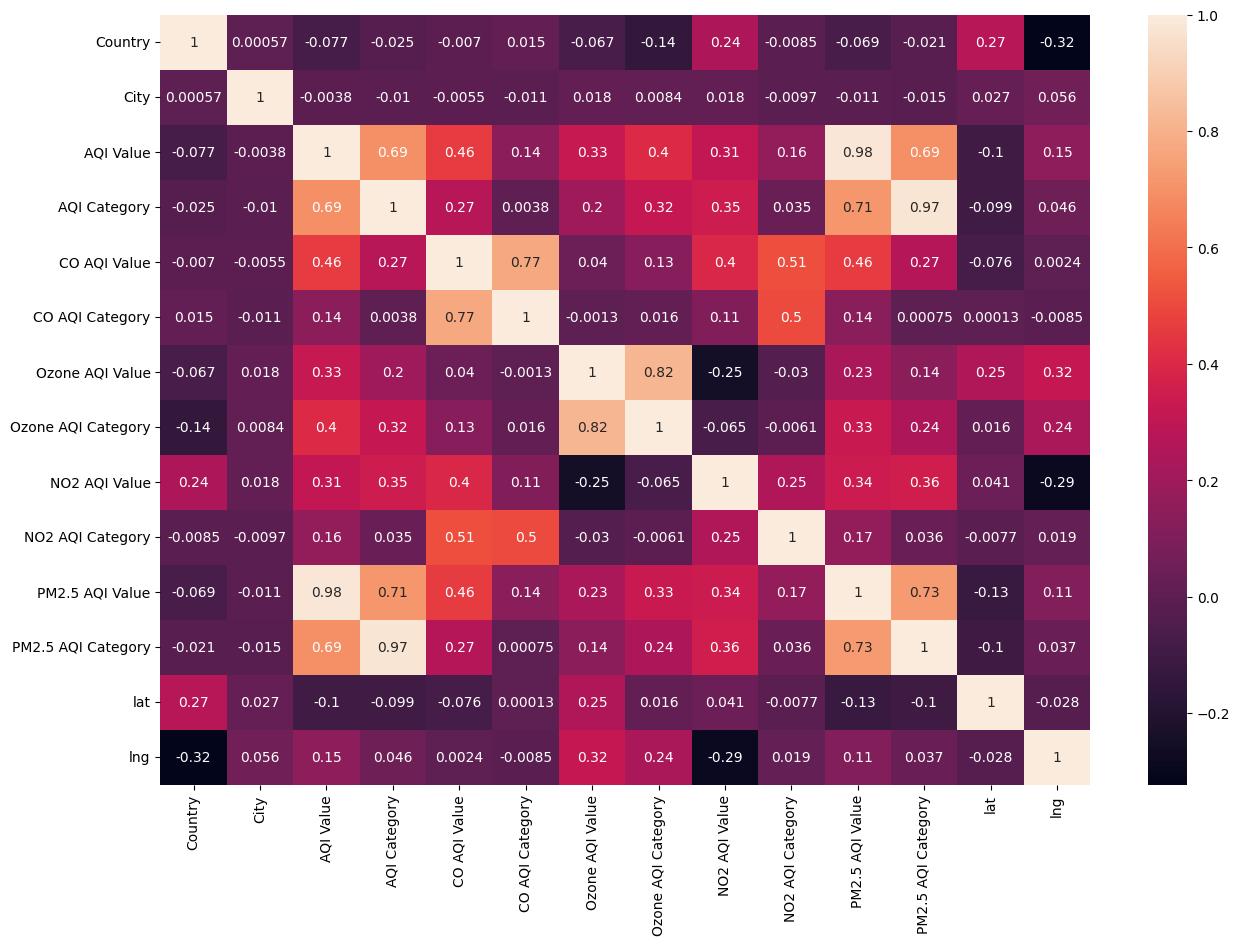

In [ ]:
# drawing the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# droping the not correlated columns
df.drop(['Country','City','lat','lng','CO AQI Category'],axis=1,inplace=True)

In [ ]:
df.head()

,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,51,2,1,36,0,0,0,51,2
1,41,0,1,5,0,1,0,41,0
2,41,0,1,5,0,1,0,41,0
3,66,2,1,39,0,2,0,66,2
4,34,0,1,34,0,0,0,20,0


In [ ]:
# Building the model

# importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xg
from sklearn.metrics import r2_score


# split x and y
X = df.drop("AQI Value",axis=1)
y = df["AQI Value"]

# split train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# model 1
model_1 = RandomForestRegressor()
model_1.fit(X_train,y_train)
print("Training Accuracy:",model_1.score(X_train,y_train))
print()
print("Testing Accuracy:",model_1.score(X_test,y_test))
print()
y_pred = model_1.predict(X_test)
print("Prediction Accuracy:",r2_score(y_test,y_pred))

Training Accuracy: 0.9997733923939078

Testing Accuracy: 0.9986900460910749

Prediction Accuracy: 0.9986900460910749


In [ ]:
# model 2
model_2 = xg.XGBRegressor()
model_2.fit(X_train,y_train)
print("Training Accuracy:",model_2.score(X_train,y_train))
print()
print("Testing Accuracy:",model_2.score(X_test,y_test))
print()
y_pred = model_2.predict(X_test)
print("Prediction Accuracy:",r2_score(y_test,y_pred))

Training Accuracy: 0.9999167919158936

Testing Accuracy: 0.9903801679611206

Prediction Accuracy: 0.9903801679611206


In [ ]:
# model 3
model_3 = LinearRegression()
model_3.fit(X_train,y_train)
print("Training Accuracy:",model_3.score(X_train,y_train))
print()
print("Testing Accuracy:",model_3.score(X_test,y_test))
print()
y_pred = model_3.predict(X_test)
print("Prediction Accuracy:",r2_score(y_test,y_pred))

Training Accuracy: 0.9741751700347119

Testing Accuracy: 0.977489058633116

Prediction Accuracy: 0.977489058633116


In [ ]:
# input values from the user
aqi_category = input("Enter AQI Category:")
co_value = int(input("Enter CO AQI Value: "))

ozone_value = int(input("Enter Ozone AQI Value: "))
ozone_category = input("Enter Ozone AQI Category: ")

no2_value = int(input("Enter NO2 AQI Value: "))
no2_category = input("Enter NO2 AQI Category: ")

pm25_value = int(input("Enter PM2.5 AQI Value: "))
pm25_category = input("Enter PM2.5 AQI Category: ")

# Step 2: Convert input into a structured format
user_input = np.array([[aqi_category,co_value, ozone_value, ozone_category,
                        no2_value, no2_category, pm25_value, pm25_category]])

# Step 3: Predict using the trained model
predict_value = model_1.predict(user_input)

# Step 4: Display prediction
print("Predicted AQI Value:", predict_value[0])

Enter AQI Category:33
Enter CO AQI Value: 4
Enter Ozone AQI Value: 5
Enter Ozone AQI Category: 6
Enter NO2 AQI Value: 8
Enter NO2 AQI Category: 9
Enter PM2.5 AQI Value: 8
Enter PM2.5 AQI Category: 7
Predicted AQI Value: 51.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
with open("RF_model.pickle",'wb') as f:
    pickle.dump(model_1,f)

In [ ]:
with open("RF_model.pickle",'rb') as f:
    RF_model = pickle.load(f)

In [ ]:
y_pred_rand= RF_model.predict(X_test)
print(r2_score(y_test,y_pred_rand))

0.9986900460910749
